<h1>Agriculture Growth Factors</h1>
<p>Across several regions, agriculture is a vital source of food production no matter where you choose your hearth. The most common crops include Potatos, Maize(corn), Wheat, Rice, Sugarcane, Sorghum, Soybeans, Cassava, and Yams. America, for instance most prominent crops are Corn, Grains, Soybeans. On average, Corn has a yield of 177.3 bushels per acre and a production estimated of 15.3 billon bushels since 2023. However, every crop requires its own certain demands, both in regional location and natural factors that could improve productivity rate. In my studies, I'll provided detail information on common crops around the world within each region(general Asia, Central America, Middle East, and Africa), which factors impact vegetation the most(varies), what is the most prominent factor globally, time consumption/ farming methods(seasonal issues), and comparing north south and middle hemishpere variations.</p>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

soil_distribution = pd.read_csv('Crop_Recommendation.csv')
factors = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')
HarvestTime_and_factors  = pd.read_csv('crop_yield.csv')
irrigation_methods = pd.read_csv('agriculture_dataset.csv')
pesticides = pd.read_csv('yield_df.csv')

Data = [soil_distribution,factors,HarvestTime_and_factors,irrigation_methods, pesticides]  
# General Information Function
def EDA(csv):
    print(csv.info())
    print(csv.columns)
    
    # Count/Percentage of Count for each column of selected dataset
    #print(csv.count())
    maxRows = csv.iloc[:, 0].count() #csv[df.column[0]].count()
    print('% of Missing Data:')
    print((1 - csv.count() / maxRows) * 100)
    
    # Summary Statistics
    print(csv.describe())


EDA(soil_distribution)
EDA(factors)
EDA(HarvestTime_and_factors)
EDA(irrigation_methods)
EDA(pesticides)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')
% of Missing Data:
Nitrogen       0.0
Phosphorus     0.0
Potassium      0.0
Temperature    0.0
Humidity       0.0
pH_Value       0.0
Rainfall       0.0
Crop           0.0
dtype: float64
          Nitrogen   Phosphorus    Potassium  Temperature     Humidity  \
count  220

Eda clean up

<h3>Soil Distribution</h3>
Soil used for cultivation is composed of mainly a mixpot of earthly matter in form of clay alongside Organic matter either living or dead, water, and Oxygen. Excluding all the minerals that could be found in soil, the primary source of nutritious minerals are the levels of Nitrogen, Potassium, and Phosphorus. Using the Soil Distirbution dataset, we'll discover the average distribution of the three minerals compared with the other factors. Let's first determine the crop type and the count of each crop within dataset,

22
Types of Crops 
 ['Rice' 'Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans'
 'MungBean' 'Blackgram' 'Lentil' 'Pomegranate' 'Banana' 'Mango' 'Grapes'
 'Watermelon' 'Muskmelon' 'Apple' 'Orange' 'Papaya' 'Coconut' 'Cotton'
 'Jute' 'Coffee']
The total count of Rice is 100
The total count of Maize is 100
The total count of ChickPea is 100
The total count of KidneyBeans is 100
The total count of PigeonPeas is 100
The total count of MothBeans is 100
The total count of MungBean is 100
The total count of Blackgram is 100
The total count of Lentil is 100
The total count of Pomegranate is 100
The total count of Banana is 100
The total count of Mango is 100
The total count of Grapes is 100
The total count of Watermelon is 100
The total count of Muskmelon is 100
The total count of Apple is 100
The total count of Orange is 100
The total count of Papaya is 100
The total count of Coconut is 100
The total count of Cotton is 100
The total count of Jute is 100
The total count of Coffee is 100


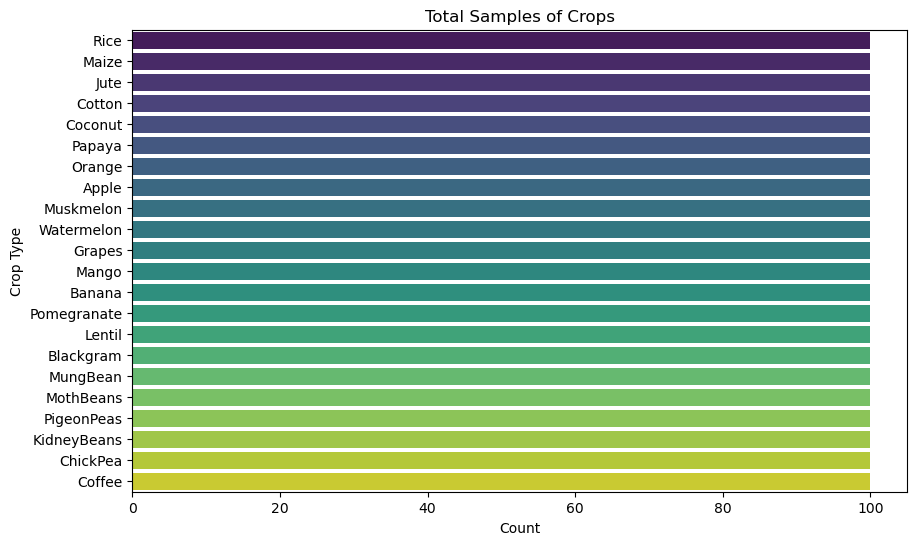

In [3]:
c_type=soil_distribution['Crop'].unique()
c_value_total=soil_distribution['Crop'].nunique()
print(c_value_total)
print(f'Types of Crops \n {c_type}')

#Print(soil_distribution['Crop'].value_counts())
for crop in c_type:
    v_count = soil_distribution['Crop'].tolist().count(crop)
    print(f'The total count of {crop} is {v_count}')
# Viz of Value Count()   
plt.figure(figsize=(10, 6))
sns.countplot(y=soil_distribution['Crop'], order=soil_distribution['Crop'].value_counts().index, palette="viridis")
plt.title('Total Samples of Crops')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.show()

Based on code above, there are a total of 22 crop all equal distributed by 100 samples for each individual instance. Below, I presented the standard statistical summaries of all crops in union w/ .describe(). However, for further analysis, I searched the average amount of distribution between factor using a hisplot, the outliers using a boxplot, the relationship between variable using a heatmap, and finally a pairplot to display the varied distribution between crops as an individual by adding hue attribute. 

Given the information, pH_value and temperature maintain a normal distribution while all except humidity are left-skewed among crops. The highest standing outlier resides in the amount of potassium present in soil nutrients. Potassium's Quartile 1 likely around 20, InterQuartile around 32, and Quartile 3 is around 49 w/ a range between 6 and 97. Most of Potassium's outliers ar found around 200 just about. The highest correlation between factor, considering the heatmap, is the subtle strong relationship of both Phosphorus and potassium which could be pausable due to the lack of possible potassium found in rich soil based on this dataset.It's also apparent that during the pairplot, potassium maintains a more rigid and static dispersion compared other factor dispersion.

          Nitrogen   Phosphorus    Potassium  Temperature     Humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

          pH_Value     Rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


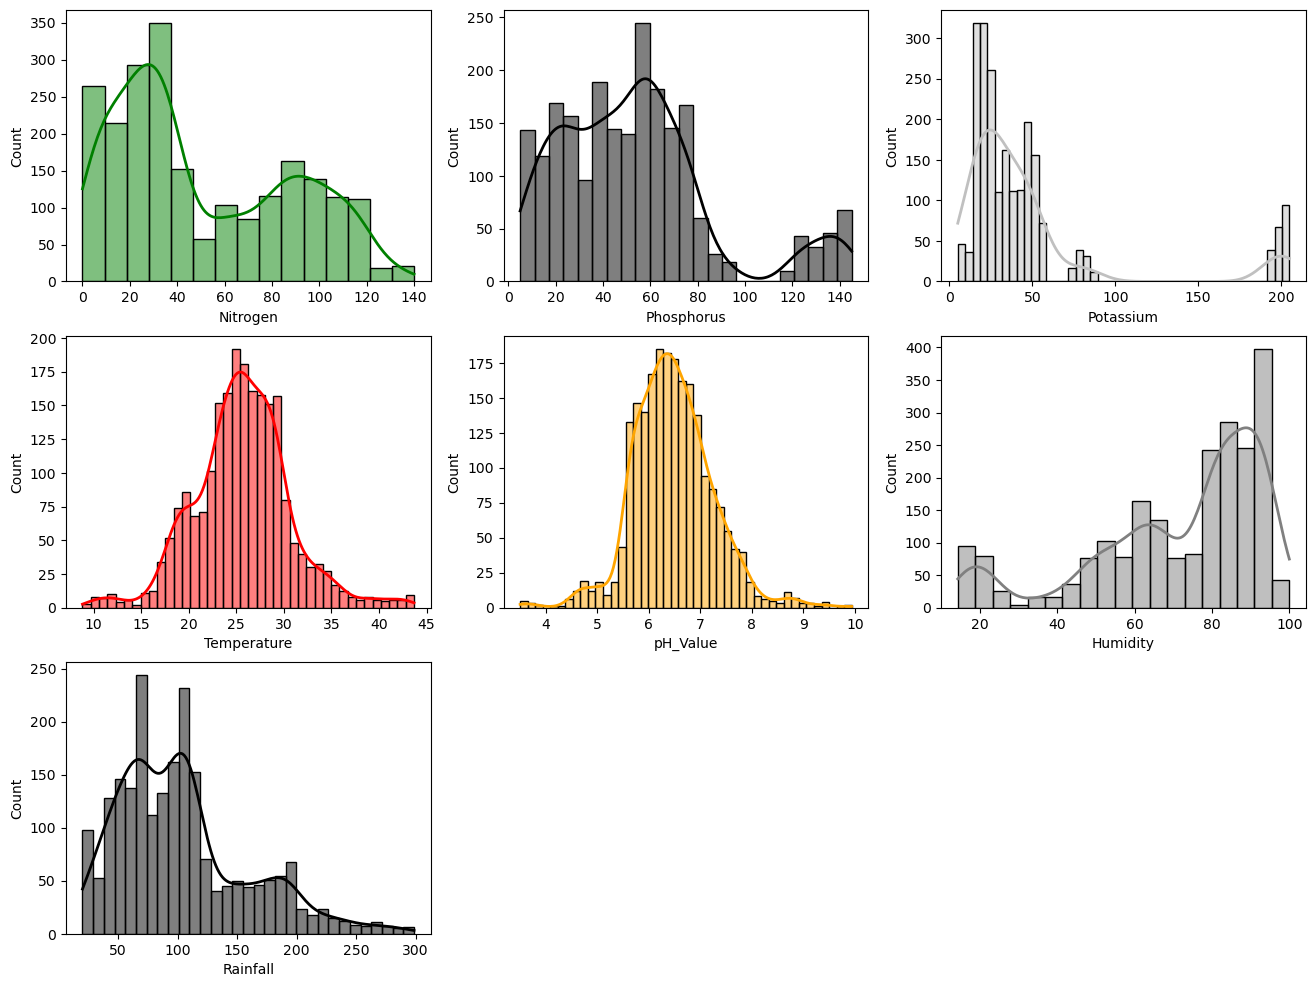

<Figure size 640x480 with 0 Axes>

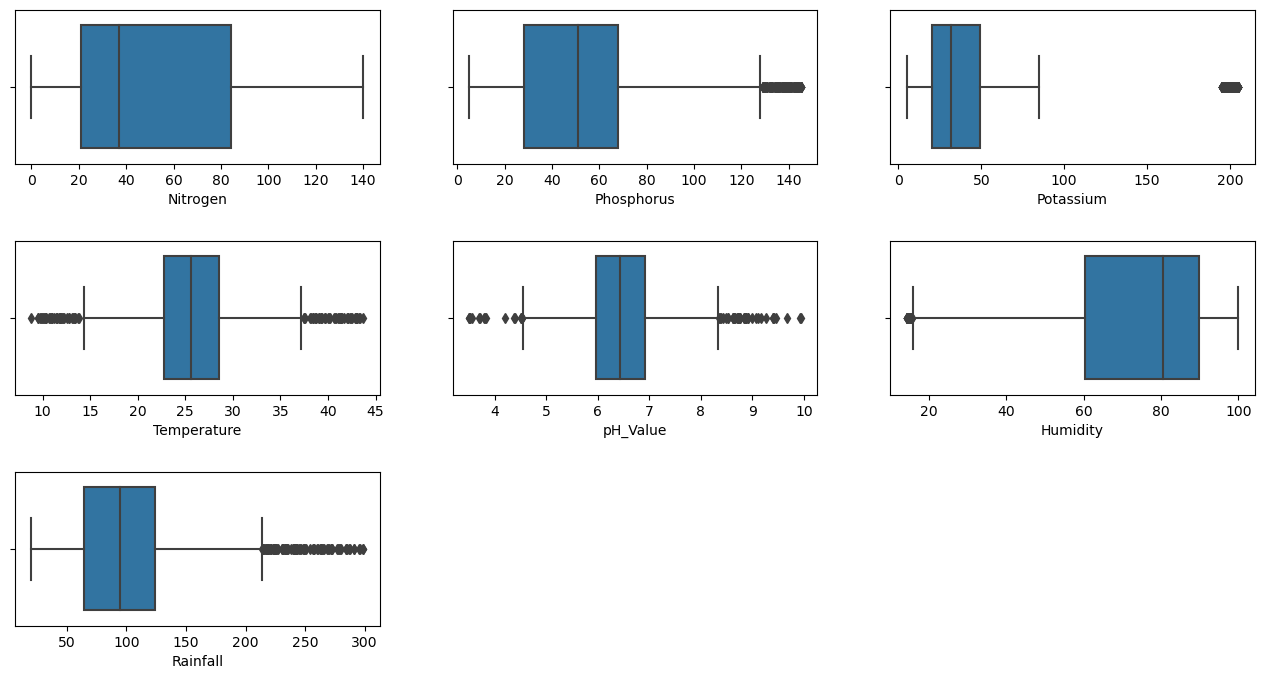

<Figure size 640x480 with 0 Axes>

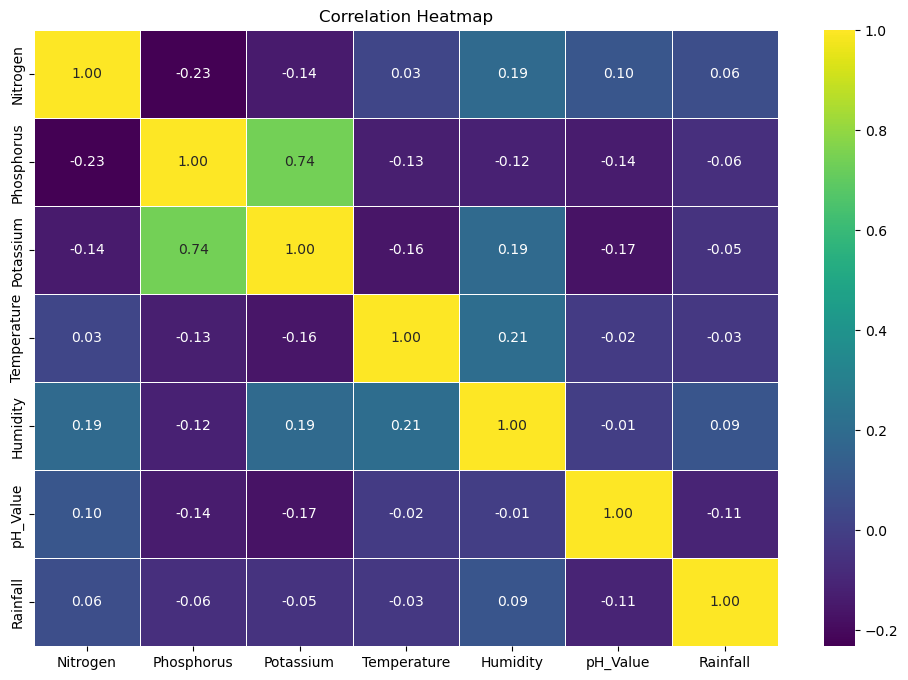

<Figure size 640x480 with 0 Axes>

In [4]:
stats_summary = soil_distribution.describe()
print(stats_summary)

#Distribution of factors
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
sns.histplot(soil_distribution['Nitrogen'],kde=True, color='green',  linewidth=1,line_kws={"color": "black", "linewidth": 2})

plt.subplot(3,3,2)
sns.histplot(soil_distribution['Phosphorus'], kde=True, color='black' ,linewidth=1,line_kws={"color": "black", "linewidth": 2})

plt.subplot(3,3,3)
sns.histplot(soil_distribution['Potassium'], kde=True,color='silver', linewidth=1,line_kws={"color": "black", "linewidth": 2})

plt.subplot(3,3,4)
sns.histplot(soil_distribution['Temperature'], kde=True,color='red',linewidth=1,line_kws={"color": "black", "linewidth": 2})

plt.subplot(3,3,5)
sns.histplot(soil_distribution['pH_Value'], kde=True,color='orange',linewidth=1, line_kws={"color": "black", "linewidth": 2})

plt.subplot(3,3,6)
sns.histplot(soil_distribution['Humidity'], kde=True,color='grey', linewidth=1,line_kws={"color": "black", "linewidth": 2})

plt.subplot(3,3,7)
sns.histplot(soil_distribution['Rainfall'], kde=True,color ='black',  linewidth=1,line_kws={"color": "black", "linewidth": 2})
plt.show()
plt.clf()

#Distribution of outliers
plt.figure(figsize=(16,8))
plt.subplots_adjust( hspace=0.5)

plt.subplot(3,3,1)
sns.boxplot(x = soil_distribution['Nitrogen'])

plt.subplot(3,3,2)
sns.boxplot(x = soil_distribution['Phosphorus'])

plt.subplot(3,3,3)
sns.boxplot(x =soil_distribution['Potassium'])

plt.subplot(3,3,4)
sns.boxplot(x = soil_distribution['Temperature'])

plt.subplot(3,3,5)
sns.boxplot(x = soil_distribution['pH_Value'])

plt.subplot(3,3,6)
sns.boxplot(x = soil_distribution['Humidity'])

plt.subplot(3,3,7)
sns.boxplot(x = soil_distribution['Rainfall'])

plt.show()
plt.clf()

#Relationships between Variables
soil_distribution_2= soil_distribution.drop(columns=['Crop'])
plt.figure(figsize=(12, 8))
sns.heatmap(soil_distribution_2.corr(), annot=True, fmt= '.2f', cbar=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
plt.clf()

#Pairplot
#sns.pairplot(soil_distribution, hue='Crop')
#plt.show()
#plt.clf()

<h3>Significant Factors</h3>
Consistant factor, when it relates to crop grow, are sunlight, temperature, Water, soil type, and gases. Some additions could include Irrigations, Adaptions methods, wind force, and Fertilizers. Based on the data below, both Fertilizers and Irrigations play a significant role in production. Generally speaking, fertilizers are an obvious effect yet Irrigations was quite a surprise for me personally. I had though soil type and sunlight would make a difference. Just my opinion, but I suppose plant wouldn't over indulge in unnecessary sunlight, unless much like human when eating food. A correct balance is likely necessary. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB
Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64
<class 'pandas.co

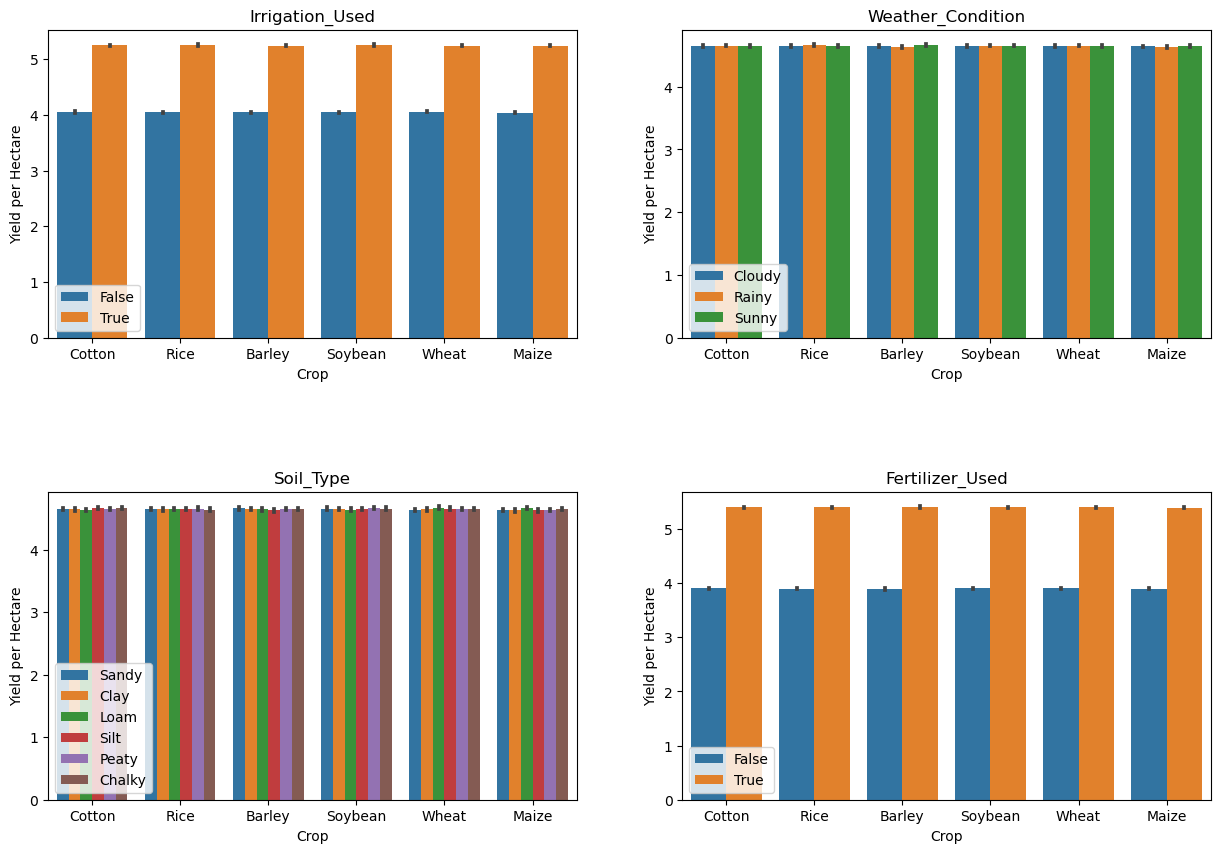

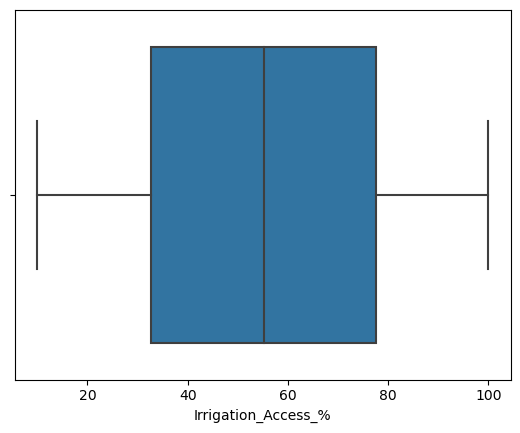

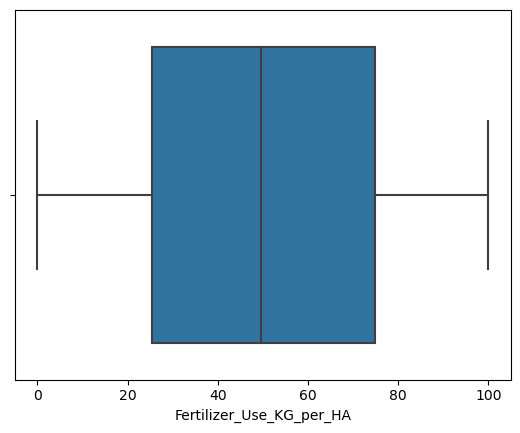

<Figure size 640x480 with 0 Axes>

In [5]:
HarvestTime_and_factors.info()
print(HarvestTime_and_factors['Crop'].value_counts())

factors.info()
print(factors['Crop_Type'].value_counts())

#By Individual Statistics 
def stats_crop(crop): # Input "crop name"
    t = HarvestTime_and_factors[HarvestTime_and_factors['Crop'] == crop].reset_index()
    return t.describe()

#Yield Sum of all Crops /w Pivot table
total_yield=HarvestTime_and_factors.pivot_table(values=['Yield_tons_per_hectare'], index='Crop', aggfunc=np.sum)
print(total_yield)

#By whole
Soil=HarvestTime_and_factors.groupby(['Crop','Soil_Type']).aggregate({'Yield_tons_per_hectare':'mean'})
print(Soil)
Weather=HarvestTime_and_factors.groupby(['Crop','Weather_Condition']).aggregate({'Yield_tons_per_hectare':np.mean})
print(Weather)
Temp=HarvestTime_and_factors.groupby(['Crop']).aggregate({'Temperature_Celsius':np.mean, 'Yield_tons_per_hectare':np.mean})
print(Temp)
Fertilizer=HarvestTime_and_factors.groupby(['Crop','Fertilizer_Used']).aggregate({'Yield_tons_per_hectare':np.mean})
print(Fertilizer)
Irrigation=HarvestTime_and_factors.groupby(['Crop','Irrigation_Used']).aggregate({'Yield_tons_per_hectare':np.mean})
print(Irrigation)
#print(Irrigation.agg([np.mean, np.max, np.min]))
Gases=factors.groupby(['Crop_Type']).aggregate({'CO2_Emissions_MT':np.mean, 'Crop_Yield_MT_per_HA':np.mean})
print(Gases)  
Adaptions=factors.groupby(['Adaptation_Strategies']).aggregate({'Crop_Yield_MT_per_HA':np.sum})
print(Adaptions)
soil_health = factors.groupby(['Region']).aggregate({'Soil_Health_Index':np.mean})
print(soil_health)

#Factor side by side bar 
def plot_factor(factor, data):
    sns.barplot(data,x='Crop', y='Yield_tons_per_hectare', hue=factor)
    plt.ylabel('Yield per Hectare')
    plt.title(f'{factor}')
    plt.legend(loc='best')
#Subplot w/ def function
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plot_factor('Irrigation_Used',HarvestTime_and_factors)
plt.subplot(2,2,2)
plot_factor('Weather_Condition',HarvestTime_and_factors)
plt.subplot(2,2,3)
plot_factor('Soil_Type',HarvestTime_and_factors)
plt.subplot(2,2,4)
plot_factor('Fertilizer_Used',HarvestTime_and_factors)
#plt.subplot(2,3,6)
#plot_factor('CO2_Emissions_MT', factors)

plt.subplots_adjust(hspace=0.5)
plt.show()

#Significant Factors
#Boxplot of outliers {Irrigation, Fertilizers}
#print(factors.groupby(['Crop_Type']).aggregate({'Irrigation_Access_%':np.mean,'Crop_Yield_MT_per_HA':np.sum}))
sns.boxplot(data=factors, x=factors['Irrigation_Access_%'])
plt.show()
plt.clf()

sns.boxplot(data=factors, x=factors['Fertilizer_Use_KG_per_HA'])
plt.show()
plt.clf()

In [6]:
#Pairplot subset
#sns.pairplot(factors.sample(n=300), hue='Crop_Type')
#plt.show()
#plt.clf()

Given the information above, Outliers for the most significant outcomes are quite similar and there Quartile zones remain nearly the same. 

<h3>Time consumption and revenue</h3>


         Days_to_Harvest
Crop                    
Barley        104.425646
Cotton        104.533800
Maize         104.538927
Rice          104.500875
Soybean       104.455945
Wheat         104.514900


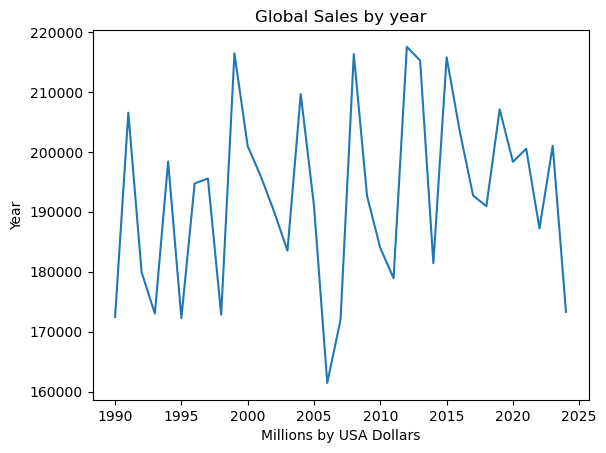

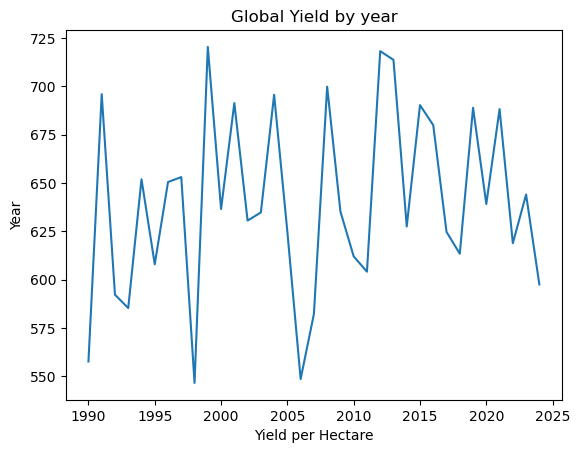

<Figure size 640x480 with 0 Axes>

In [7]:

#Average Harvest of Crops
time_consumption= HarvestTime_and_factors.groupby(['Crop']).aggregate({'Days_to_Harvest':np.mean})
print(time_consumption)


# Line Chart by Year 
yearly = factors.groupby(['Year'])[['Economic_Impact_Million_USD', 'Crop_Yield_MT_per_HA']].sum()
#by_crop_yearly = factors.groupby(['Year','Crop_Type'])[['Economic_Impact_Million_USD', 'Crop_Yield_MT_per_HA']].sum()
#print(yearly)
#print(by_crop_yearly)
'''
print(yearly.sort_values(by='Economic_Impact_Million_USD',ascending=False)) # Max value of row of 'Economic_Impact_Million_USD' is 2012
print(yearly.sort_values(by='Crop_Yield_MT_per_HA',ascending=False)) # Max value of row of 'Crop_Yield_MT_per_HA' is 1999
sorted_v= yearly.sort_values(by='Economic_Impact_Million_USD',ascending=False)
print(sorted_v.iloc[:1])
'''

# Yearly Sales
plt.plot(yearly['Economic_Impact_Million_USD'])
plt.xlabel('Millions by USA Dollars')
plt.ylabel('Year')
plt.title('Global Sales by year')
plt.show()
plt.clf()

# Yearly Crop Yield
plt.plot(yearly['Crop_Yield_MT_per_HA'])
plt.plot()
plt.xlabel('Yield per Hectare')
plt.ylabel('Year')
plt.title('Global Yield by year')
plt.show()
plt.clf()